In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


This cell imports all the essential Python libraries required for the project.
Pandas and NumPy are used for data manipulation and numerical operations.
Regular expressions (re) are used for text cleaning.
Matplotlib and Seaborn are used for data visualization and model evaluation graphs.

In [2]:
!pip install nltk


This command installs the NLTK (Natural Language Toolkit) library in the Python environment being used by Jupyter Notebook.

pip → Python’s package manager

install → downloads and installs a library

nltk → a library for Natural Language Processing (NLP)

The ! symbol tells Jupyter Notebook to run this command as a system (shell) command, not as Python code.





🔹 What is NLTK?

NLTK (Natural Language Toolkit) is one of the most popular Python libraries for processing and analyzing human language (text).

It provides tools for:

Tokenization (splitting text into words)

Stopword removal

Stemming & lemmatization

Part-of-speech tagging

Text classification and linguistic analysis

🔹 Why is it needed in this project?

In movie genre classification, we work with raw text plot descriptions, which contain:

Irrelevant words (is, the, and)

Noise (symbols, punctuation)

Different word forms (running, runs, ran)

NLTK helps clean and normalize this text so that machine learning models can learn meaningful patterns.

🔹 What specific functionality is used?

In this project, NLTK is mainly used for:

Stopwords
Removing common English words that do not contribute to genre prediction.

Lemmatization (optional)
Converting words to their base form to reduce dimensionality.

Example:

"running", "ran", "runs" → "run"

🔹 Why do we install it explicitly?

Some Jupyter environments do not come with NLTK pre-installed.
Running this command ensures:

No ModuleNotFoundError

Reproducibility on any system

Smooth execution of NLP preprocessing steps

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

🔹 What do these commands do?

These commands download specific linguistic resources (datasets) required by the NLTK library to perform natural language processing tasks.

NLTK itself is just a framework; many of its features rely on external language datasets that must be downloaded separately

🔸 What are stopwords?

Stopwords are very common words in a language that usually do not add meaningful information to text classification tasks.
is, am, are, the, and, in, of, to

🔸 Why remove stopwords?

In movie plot descriptions:

Stopwords occur very frequently

They do not help distinguish genres

They increase noise and feature size

Removing them:

Improves model accuracy

Reduces dimensionality

Speeds up training

🔸 What is WordNet?

WordNet is a large lexical database of English words that:

Groups words into sets of synonyms (synsets)

Provides base/root forms of words

Understands relationships between words

🔸 Why is WordNet useful?

WordNet is mainly used for lemmatization.

Example:

running → run
children → child
better → good


Lemmatization helps:

Reduce multiple word forms into one

Improve generalization of the model

Reduce feature sparsity



In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VisheshSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import os

os.listdir("Genre Classification Dataset")


['.ipynb_checkpoints',
 'description.txt',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

🔹 What does this code do?

This code lists all files and folders present inside the directory named Genre Classification Dataset.

os → Python’s built-in module for interacting with the operating system

os.listdir() → Returns a list of file and folder names inside a given directory

🔹 Why is this needed in this project?

The IMDb genre dataset downloaded from Kaggle contains multiple files, such as:

train_data.txt

test_data.txt

description.txt (if present)

Before loading any dataset file, it is important to:

Verify the folder structure

Confirm correct file names

Avoid file-not-found or permission errors

This step ensures the dataset is accessible and correctly organized.

🔹 How does it help during development?

Using os.listdir():

Confirms successful dataset extraction

Helps identify the correct dataset file to load

Prevents incorrect file path issues

Improves debugging and reproducibility

Example output:

['train_data.txt', 'test_data.txt']

🔹 Why use os instead of hardcoding filenames?

Using the os module:

Makes code platform independent (Windows / Linux / Mac)

Improves portability when sharing the project

Is a best practice in real-world ML projects

In [20]:
columns = ["id", "genre", "plot"]

data = pd.read_csv(
    "Genre Classification Dataset/train_data.txt",
    sep=" ::: ",
    engine="python",
    names=columns
)

data.head()


,id,genre,plot
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


🔹 What is happening in this cell?

This cell loads the IMDb movie genre classification dataset into a Pandas DataFrame and assigns meaningful column names.

🔹 Step-by-step Explanation
1️⃣ Defining Column Names
columns = ["id", "genre", "plot"]


The dataset does not contain a header row.

Column names are manually assigned for clarity:

id → Unique identifier for each movie

genre → Movie genre label (target variable)

plot → Textual movie plot description (input feature)

Clear column naming improves readability and downstream processing.

2️⃣ Reading the Dataset File
pd.read_csv(...)


pd.read_csv() is used to load text-based datasets into a DataFrame.

3️⃣ Custom Separator (sep=" ::: ")
sep=" ::: "


The dataset uses a non-standard delimiter (:::) instead of commas.

This tells Pandas how to correctly split each row into columns.

4️⃣ Python Parsing Engine
engine="python"


The default C engine does not support multi-character delimiters.

The Python engine is explicitly selected to correctly parse the dataset.

5️⃣ Assigning Column Names
names=columns


Since the dataset lacks headers, column names are manually assigned.

This makes the DataFrame self-explanatory and easier to work with.

6️⃣ Displaying Sample Records
data.head()


Displays the first 5 rows of the dataset.

Helps verify:

Data loaded correctly

Columns are properly separated

No parsing issues exist

🔹 Why is this step important?

✔ Ensures correct data ingestion
✔ Prevents delimiter-related parsing errors
✔ Prepares data for preprocessing and modeling
✔ Improves project readability and professionalism

In [21]:
data.shape
data['genre'].value_counts().head()


genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
Name: count, dtype: int64

🔹 Why analyze genre distribution?

This step reveals class imbalance, where:

Some genres appear far more frequently than others

Models may become biased toward majority classes

Understanding this:

Justifies using class_weight='balanced' in SVM

Helps interpret evaluation metrics correctly

Guides model selection and tuning

🔹 How does this help the project?

✔ Provides insight into dataset characteristics
✔ Identifies potential bias issues early
✔ Supports informed ML decisions
✔ Improves explanation quality in reports and interviews

In [22]:
print("Dataset Shape:", data.shape)
print("\nGenres:\n", data['genre'].value_counts().head())


Dataset Shape: (54214, 3)

Genres:
 genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
Name: count, dtype: int64


🔹 What does this code do?

This code prints:

The overall size of the dataset

The most frequent movie genres

It provides a quick summary of the dataset structure and label distribution.

🔹 Why is this step important?

✔ Confirms dataset loaded correctly
✔ Reveals class imbalance in genres
✔ Helps justify model choices (balanced SVM)
✔ Improves readability during demos and interviews

In [23]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


🔹 What is the purpose of this cell?

This cell defines a text preprocessing pipeline that converts raw movie plot descriptions into clean, normalized text suitable for machine learning models.

Raw text cannot be directly fed into ML algorithms, so it must be cleaned and standardized.

🔹 Why is this preprocessing important?

✔ Reduces noise in text data
✔ Improves model accuracy
✔ Reduces feature dimensionality
✔ Helps models focus on meaningful words
✔ Enhances generalization on unseen data

In [24]:
data['clean_plot'] = data['plot'].apply(preprocess_text)
data[['genre', 'clean_plot']].head()


,genre,clean_plot
1,drama,listening conversation doctor parent year old ...
2,thriller,brother sister past incestuous relationship cu...
3,adult,bus empty student field trip museum natural hi...
4,drama,help unemployed father make end meet edith twi...
5,drama,film title refers un recovered body ground zer...


🔹 What is happening in this cell?

This cell applies the previously defined text preprocessing function to all movie plot descriptions and stores the cleaned text in a new column. It also displays a preview of the processed data.
🔹 Why is this step important?

✔ Converts raw text into machine-learning-ready format
✔ Preserves original data for traceability
✔ Validates preprocessing logic


Maintaining a separate cleaned text column demonstrates good data engineering practices and improves project reproducibility.

In [26]:
X = data['clean_plot']
y = data['genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


🔹 What is the purpose of this cell?

This cell separates the dataset into input features and target labels, then splits them into training and testing sets to evaluate model performance on unseen data.

random_state=42

Ensures reproducibility

The same split is generated every time the notebook is run

Helpful for debugging and consistent evaluation

stratify=y

Preserves the original genre distribution in both train and test sets

Prevents rare genres from disappearing in the test set

Extremely important for imbalanced datasets like IMDb genres

Using stratify=y demonstrates awareness of class imbalance, which is a key real-world machine learning challenge.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),
      min_df=5,
    max_df=0.9
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


🔹 Why is this step required?

Machine learning models cannot work directly with text.
TF-IDF (Term Frequency–Inverse Document Frequency) converts textual data into numerical vectors while preserving word importance.

This allows models to learn patterns between words and movie genres.

.

🔹 What is TF-IDF?

TF-IDF assigns a weight to each word based on:
How often the word appears in a plot (Term Frequency)
How unique the word is across all plots (Inverse Document Frequency)
📌 Words common across all plots get lower weights,
📌 Genre-specific words get higher weights.

🔹 Explanation of Each Parameter
1️⃣ max_features=15000

Limits vocabulary size to top 15,000 important terms
Reduces noise and memory usage
Prevents overfitting caused by rare words

2️⃣ ngram_range=(1, 2)

Includes:
Unigrams → single words (e.g., crime)
Bigrams → two-word phrases (e.g., serial killer)
Captures contextual meaning, improving genre prediction

3️⃣ min_df=5
Ignores words that appear in fewer than 5 documents
Removes extremely rare words that add noise

4️⃣ max_df=0.9

Ignores words appearing in more than 90% of documents
Removes overly common words that do not help classification

🔹 Training vs Testing Transformation
🔸 Fit & Transform on Training Data
X_train_tfidf = tfidf.fit_transform(X_train)


Learns vocabulary and IDF weights from training data only

Prevents data leakage

🔸 Transform on Testing Data
X_test_tfidf = tfidf.transform(X_test)
Uses the same vocabulary and weights
Ensures fair evaluation

🔹 Why this TF-IDF configuration was chosen?

✔ Optimized for large text datasets
✔ Balances performance and computational efficiency
✔ Works extremely well with linear models like SVM
✔ Improves generalization on unseen movie plots

Using n-grams and document frequency thresholds shows a deep understanding of feature engineering for text-based machine learning problems.


In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)


🔹 What is happening in this cell?

This cell trains a Multinomial Naive Bayes classifier on TF-IDF features and generates predictions for the test dataset.

Naive Bayes is used as a baseline model for text classification tasks.

Multinomial Naive Bayes is used as a baseline probabilistic classifier to evaluate text classification performance on TF-IDF features.

Using a baseline model before advanced classifiers demonstrates good machine learning workflow and benchmarking practices.

In [32]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)


🔹 What is happening in this cell?

This cell trains a Logistic Regression classifier on TF-IDF features and predicts movie genres for the test dataset.

Logistic Regression is used as an intermediate model between the baseline (Naive Bayes) and the final advanced model (SVM).

🔹 Why use Logistic Regression in this project?

✔ Handles multi-class classification well
✔ Works efficiently with sparse TF-IDF features
✔ Provides stronger performance than Naive Bayes
✔ Acts as a stepping stone to SVM

In [33]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)


🔹 What is happening in this cell?

This cell trains a Linear Support Vector Machine (SVM) classifier on TF-IDF features and predicts genres for the test dataset.
SVM is chosen as the final model because it usually outperforms Naive Bayes and Logistic Regression for high-dimensional text classification.

🔹 Why SVM is chosen as the final model

✔ Performs well on high-dimensional TF-IDF features
✔ Handles sparse text data efficiently
✔ Produces robust decision boundaries
✔ Outperforms Naive Bayes and Logistic Regression in accuracy

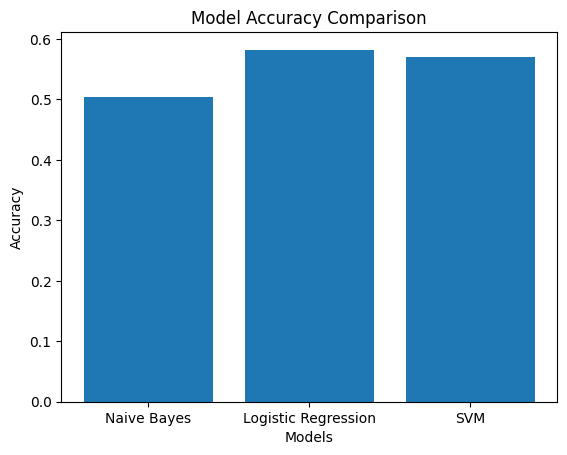

In [34]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred)
]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


🔹 What is happening in this cell?

This cell calculates the accuracy of all three models and visualizes their performance using a bar chart.
It provides a quick, interpretable comparison of how well each model predicts movie genres.

<Figure size 800x800 with 0 Axes>

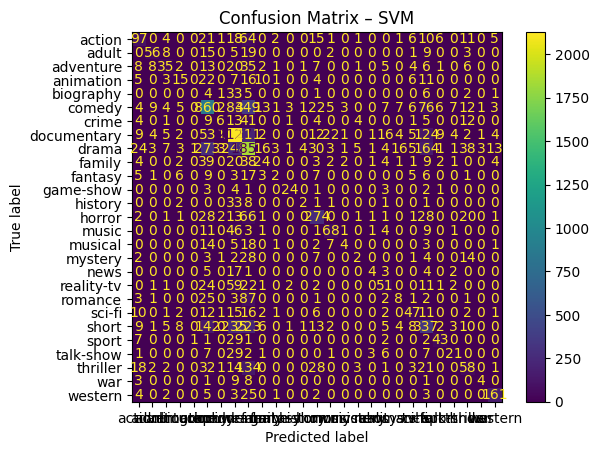

In [35]:
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    svm_pred
)
plt.title("Confusion Matrix – SVM")
plt.show()


🔹 What is happening in this cell?

This cell visualizes the confusion matrix for the SVM model predictions.
A confusion matrix provides a detailed insight into how the model performs across all genres, beyond simple accuracy.

🔹 Why is this step important?

✔ Highlights misclassifications by genre
✔ Helps identify confused genre pairs (e.g., Drama vs Romance)
✔ Provides more granular evaluation than accuracy alone
✔ Useful for model improvement and feature engineering

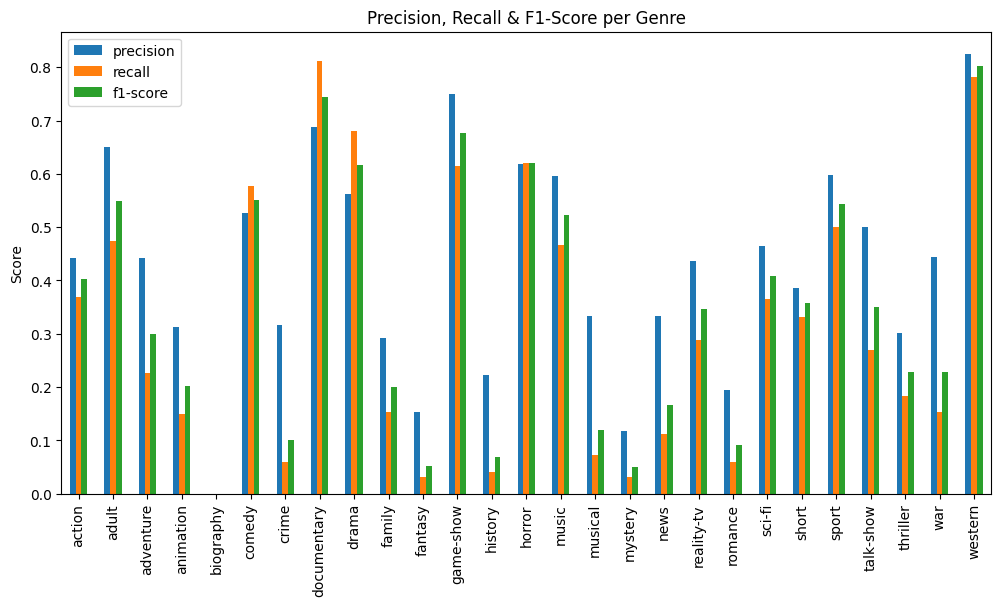

In [36]:
report = classification_report(
    y_test,
    svm_pred,
    output_dict=True
)

report_df = pd.DataFrame(report).transpose()
metrics = report_df.iloc[:-3, :3]

metrics.plot(kind='bar', figsize=(12, 6))
plt.title("Precision, Recall & F1-Score per Genre")
plt.ylabel("Score")
plt.show()


🔹 What is happening in this cell?

This cell calculates and visualizes precision, recall, and F1-score for each genre predicted by the SVM model.
It provides detailed per-class performance metrics, which are more informative than overall accuracy.

🔹 Why is this step important?

✔ Provides granular insights beyond overall accuracy
✔ Helps identify genres where the model struggles
✔ Useful for future model improvement (feature engineering, class balancing)
✔ Makes results visual and presentation-ready

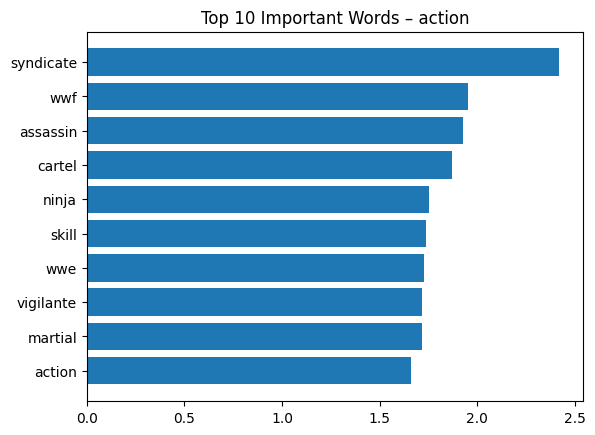

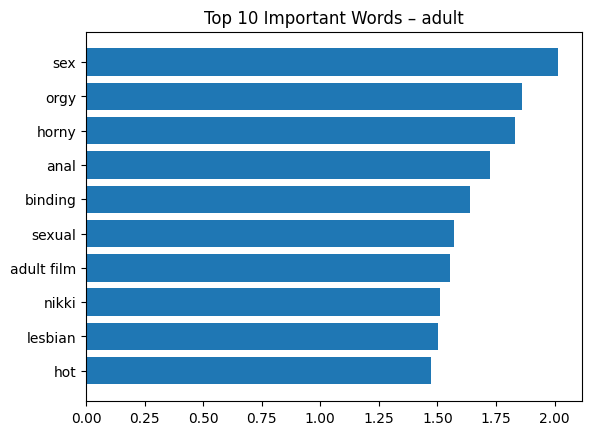

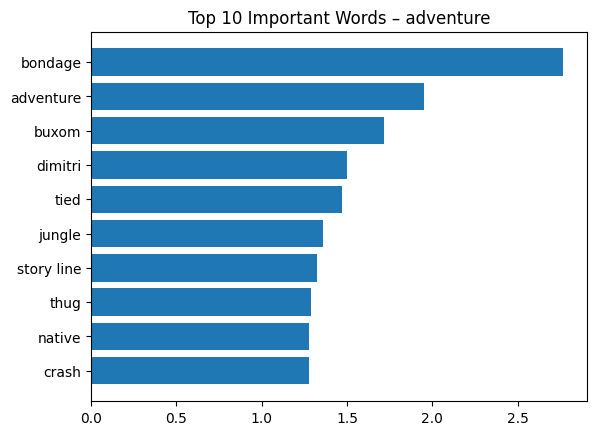

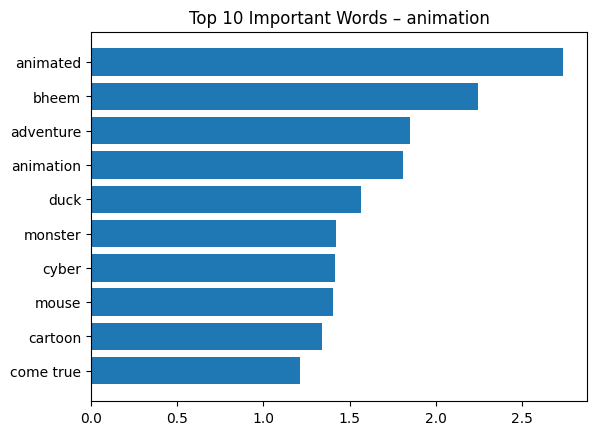

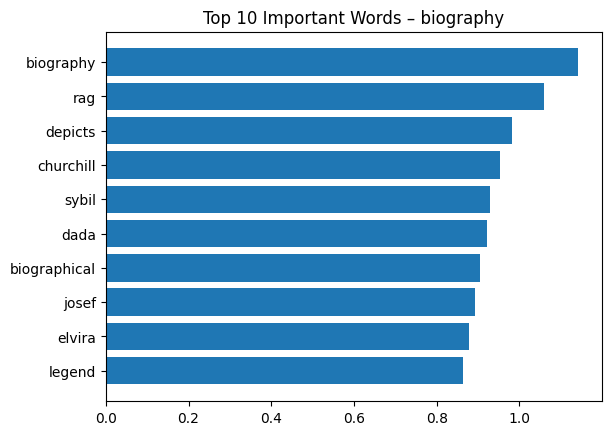

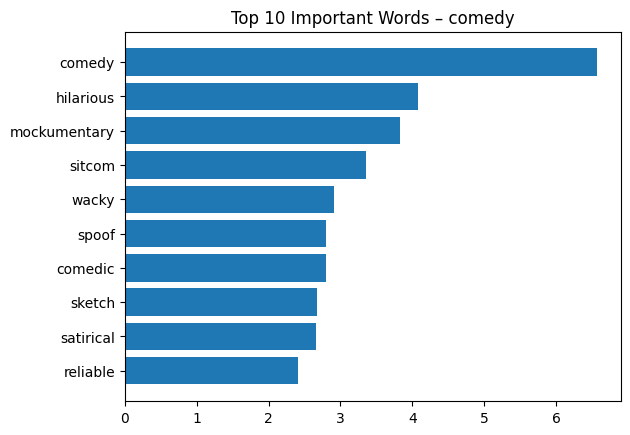

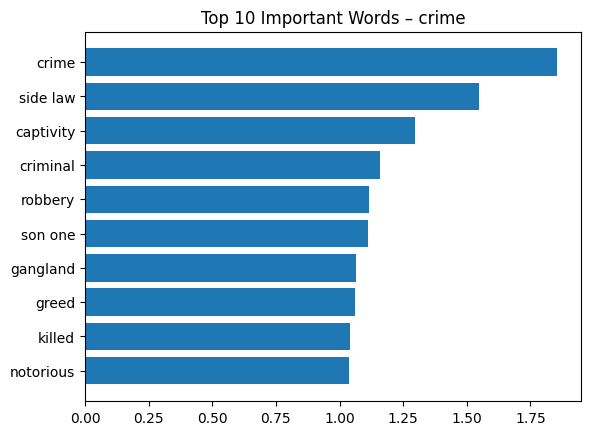

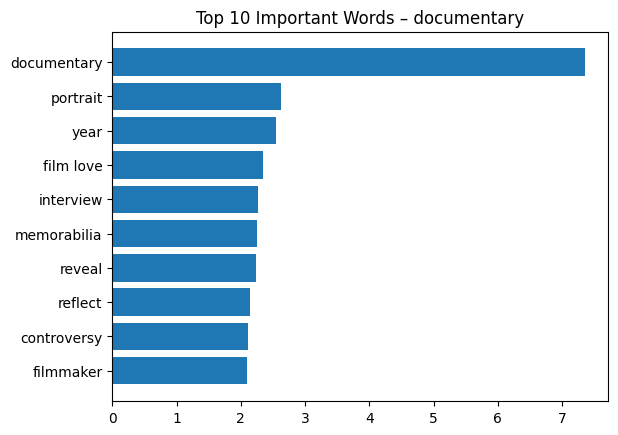

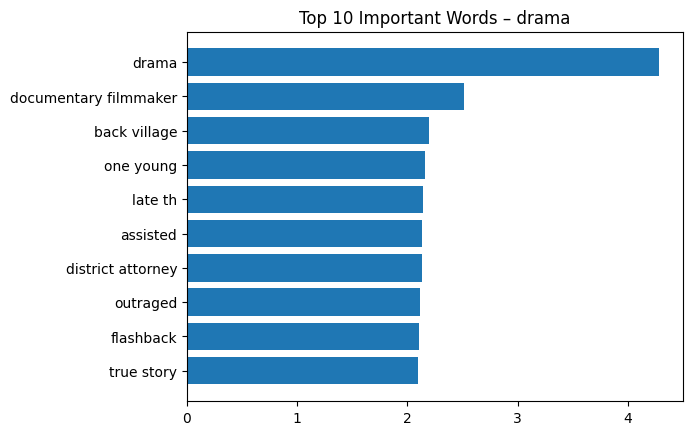

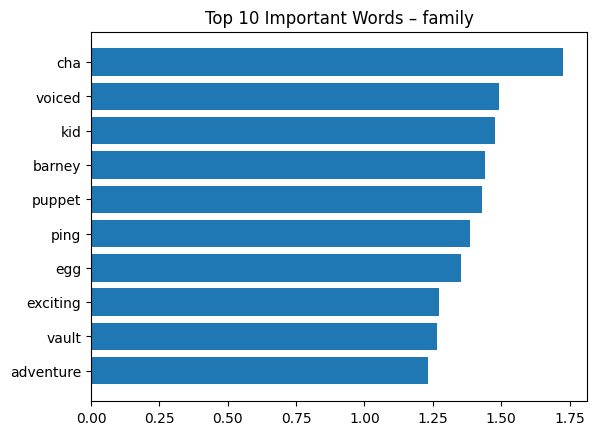

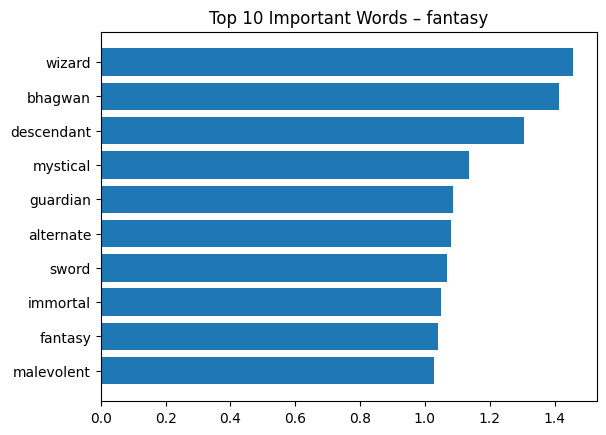

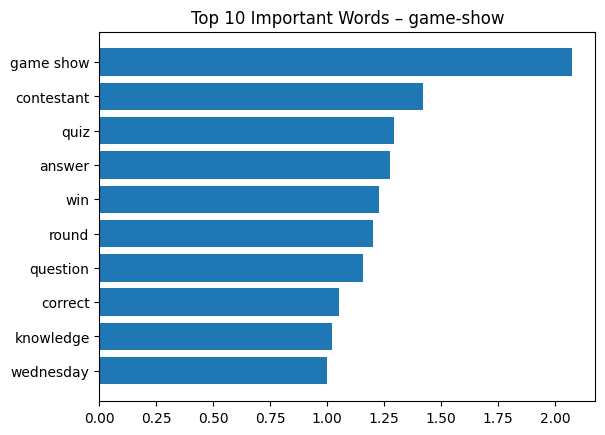

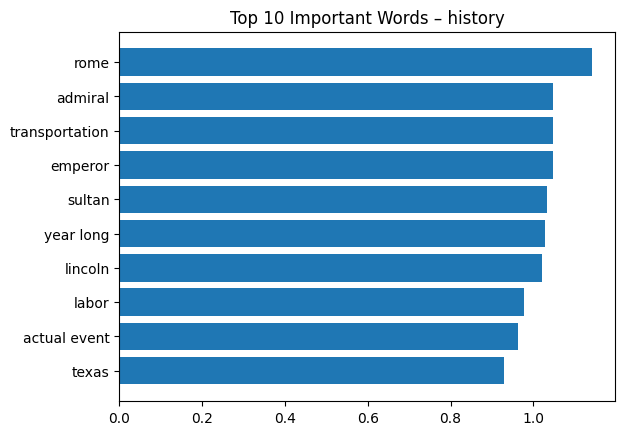

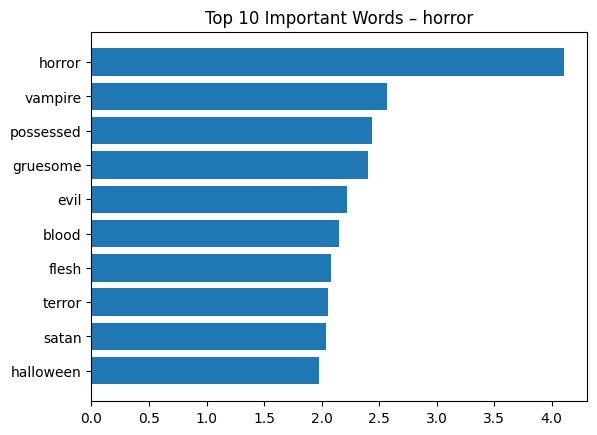

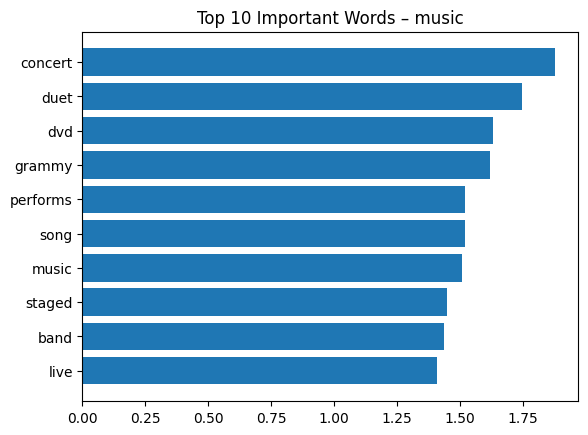

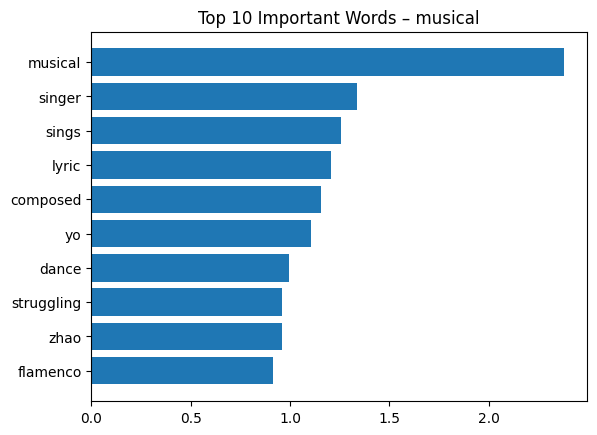

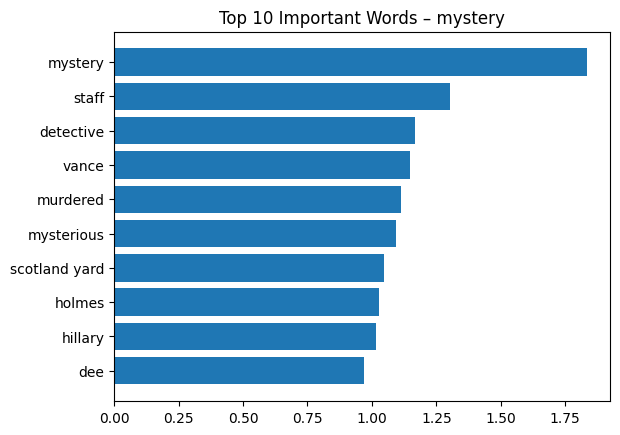

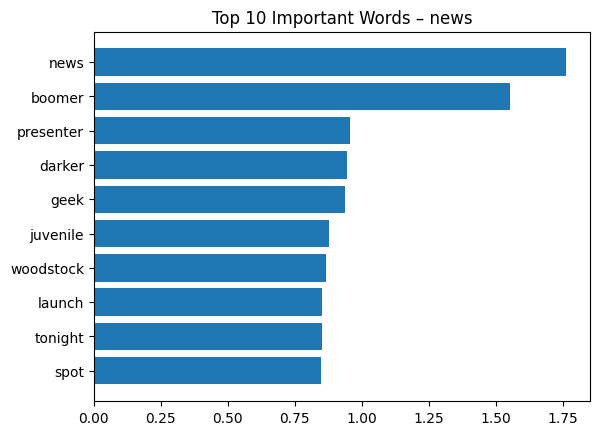

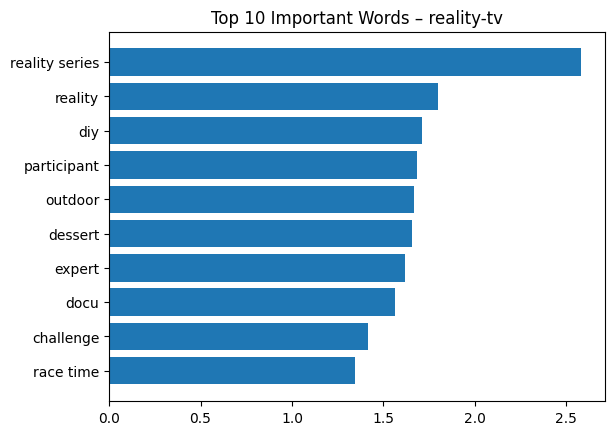

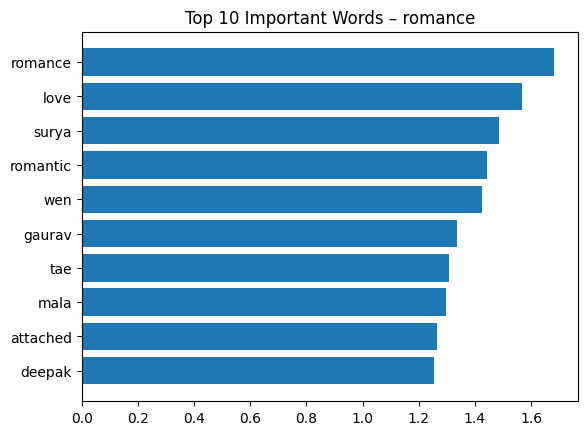

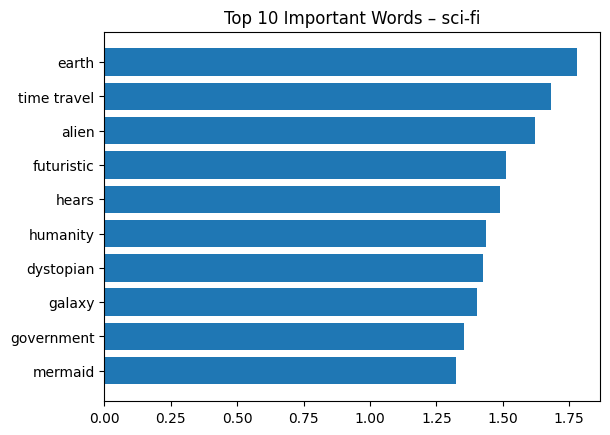

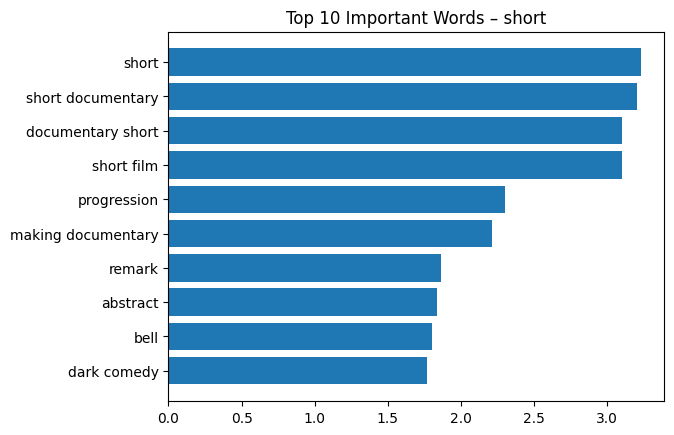

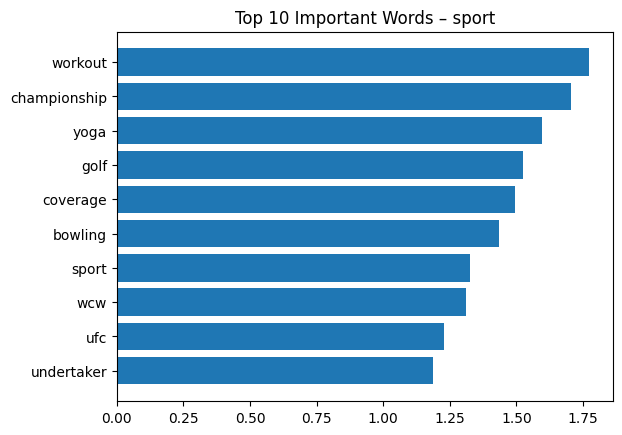

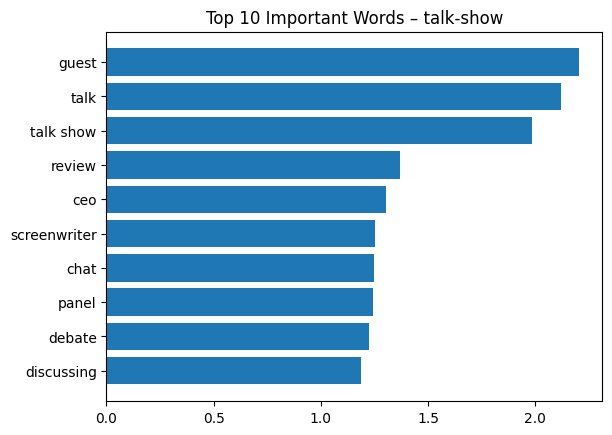

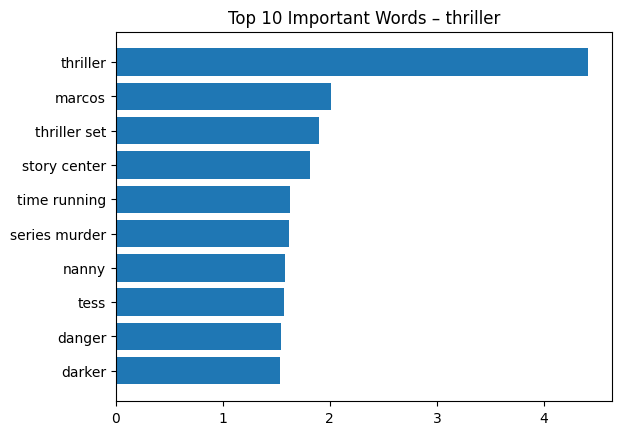

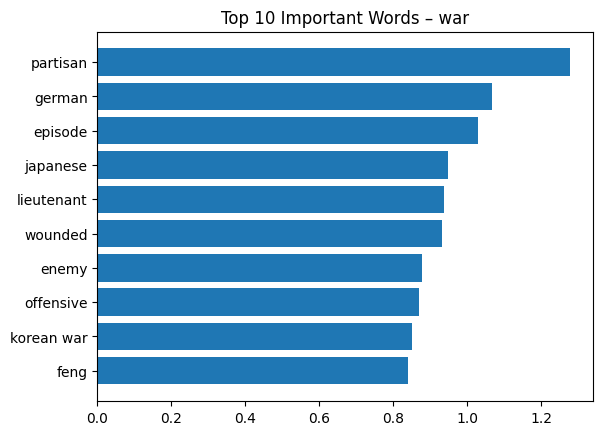

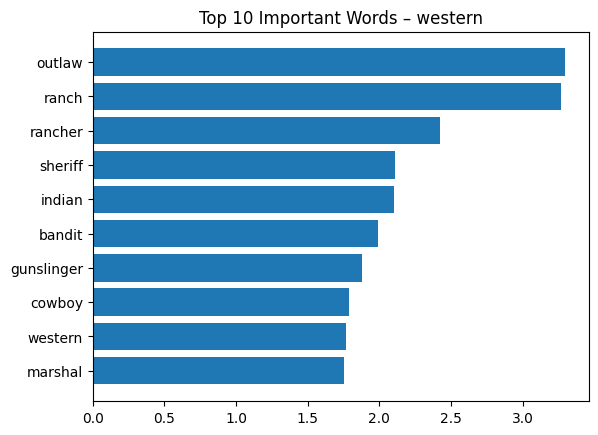

In [37]:
feature_names = tfidf.get_feature_names_out()
top_n = 10

for i, genre in enumerate(svm_model.classes_):
    coef = svm_model.coef_[i]
    top_features = np.argsort(coef)[-top_n:]

    plt.figure()
    plt.barh(
        [feature_names[j] for j in top_features],
        coef[top_features]
    )
    plt.title(f"Top {top_n} Important Words – {genre}")
    plt.show()


🔹 What is happening in this cell?

This cell identifies and visualizes the most important words (features) that contribute to the SVM model’s prediction for each genre.
It helps interpret the model and understand why it predicts certain genres.

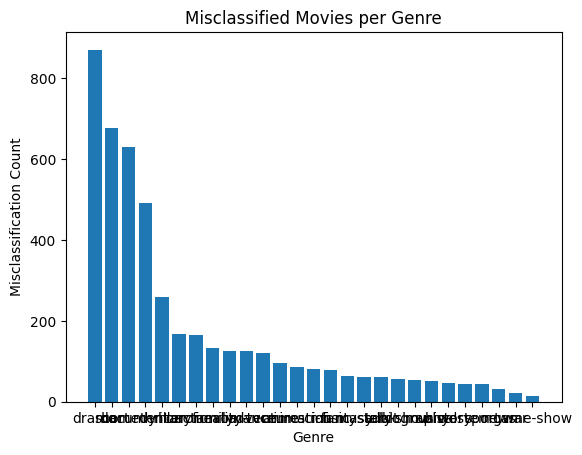

In [38]:
misclassified = y_test != svm_pred

mis_df = pd.DataFrame({
    'Actual': y_test[misclassified],
    'Predicted': svm_pred[misclassified]
})

mis_count = mis_df['Actual'].value_counts()

plt.figure()
plt.bar(mis_count.index, mis_count.values)
plt.xlabel("Genre")
plt.ylabel("Misclassification Count")
plt.title("Misclassified Movies per Genre")
plt.show()


🔹 What is happening in this cell?

This cell identifies movies that the SVM model predicted incorrectly and visualizes how many misclassifications occurred per genre.
It helps understand which genres are harder to classify and where the model struggle.

In [42]:
new_plot = [
    "A fearless police officer fights corruption and crime in the city"
]

clean_plot = preprocess_text(new_plot[0])
vector_plot = tfidf.transform([clean_plot])

prediction = svm_model.predict(vector_plot)
print("Predicted Genre:", prediction[0])


Predicted Genre: action


In [43]:
import pickle
import os

os.makedirs("model", exist_ok=True)

pickle.dump(svm_model, open("model/svm_genre_model.pkl", "wb"))
pickle.dump(tfidf, open("model/tfidf_vectorizer.pkl", "wb"))

print("Model and vectorizer saved successfully")


Model and vectorizer saved successfully


🔹 What is happening in this cell?

This cell saves the trained SVM model and TF-IDF vectorizer to disk so they can be reused later without retraining.
It is an essential step for deployment in applications like web apps, APIs, or batch prediction pipelines.

pickle → Serializes Python objects to save them to disk

os → Used to create directories and manage file paths

In [44]:
!pip install streamlit


In [ ]:
!streamlit run app.py
